In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('dataset_orientation_maroc_6000.csv')
df = pd.DataFrame(data)
df

,Moyenne_Generale,Note_Maths,Note_Physique,Note_Francais,Filiere_Bac,Recommendation
0,14.49,13.77,13.74,10.17,SM-A,ENSA / ENSAM
1,12.59,14.90,14.57,15.51,SM-A,ENSA / ENSAM
2,14.94,13.36,12.83,16.42,PC,FST
3,17.57,14.33,14.88,14.34,SM-B,ENSA / ENSAM
4,12.30,16.40,17.19,14.44,SM-B,ENSA / ENSAM
...,...,...,...,...,...,...
5995,13.51,14.12,16.18,11.46,SM-A,ENSA / ENSAM
5996,16.46,17.42,15.60,18.55,SM-B,Medecine / Pharmacie
5997,10.00,17.05,17.23,14.21,SM-B,ENSA / ENSAM
5998,14.40,16.62,17.33,15.01,SM-A,CPGE (Prépas)


In [6]:
cols = df.select_dtypes(include=['number']).columns.to_list()
cols

['Moyenne_Generale', 'Note_Maths', 'Note_Physique', 'Note_Francais']

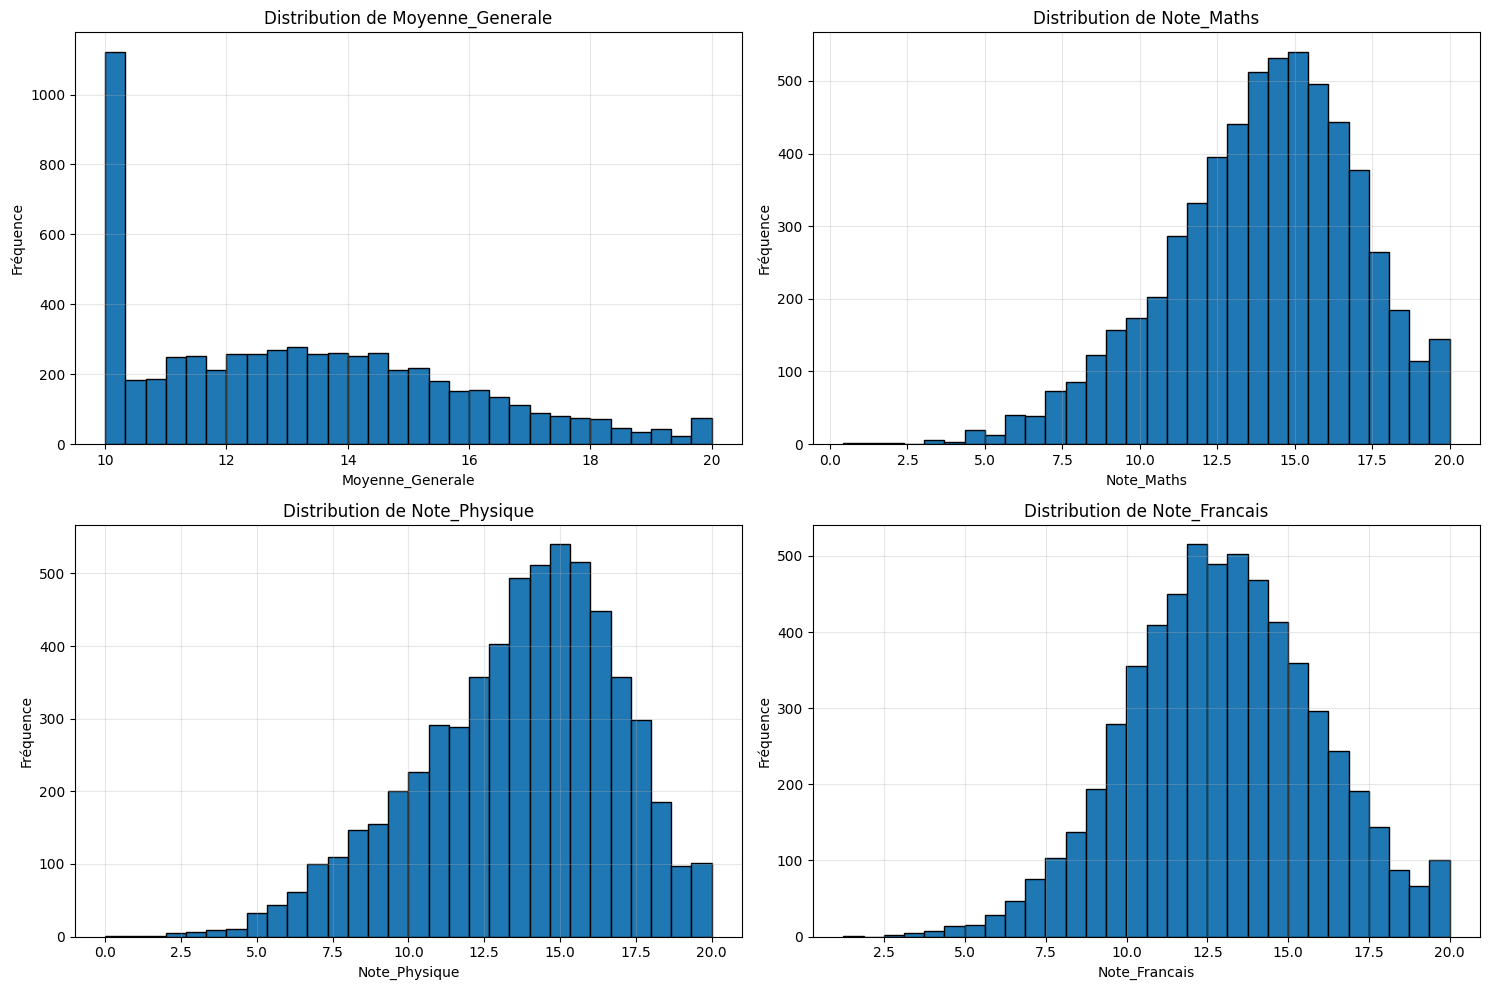

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de {col}')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Filiere_Bac_Encoded'] = le.fit_transform(df['Filiere_Bac'])
df

,Moyenne_Generale,Note_Maths,Note_Physique,Note_Francais,Filiere_Bac,Recommendation,Filiere_Bac_Encoded
0,14.49,13.77,13.74,10.17,SM-A,ENSA / ENSAM,2
1,12.59,14.90,14.57,15.51,SM-A,ENSA / ENSAM,2
2,14.94,13.36,12.83,16.42,PC,FST,1
3,17.57,14.33,14.88,14.34,SM-B,ENSA / ENSAM,3
4,12.30,16.40,17.19,14.44,SM-B,ENSA / ENSAM,3
...,...,...,...,...,...,...,...
5995,13.51,14.12,16.18,11.46,SM-A,ENSA / ENSAM,2
5996,16.46,17.42,15.60,18.55,SM-B,Medecine / Pharmacie,3
5997,10.00,17.05,17.23,14.21,SM-B,ENSA / ENSAM,3
5998,14.40,16.62,17.33,15.01,SM-A,CPGE (Prépas),2


In [15]:
le_target = LabelEncoder()
df['Recommendation_Encoded'] = le_target.fit_transform(df['Recommendation'])
df

,Moyenne_Generale,Note_Maths,Note_Physique,Note_Francais,Filiere_Bac,Recommendation,Filiere_Bac_Encoded,Recommendation_Encoded
0,14.49,13.77,13.74,10.17,SM-A,ENSA / ENSAM,2,2
1,12.59,14.90,14.57,15.51,SM-A,ENSA / ENSAM,2,2
2,14.94,13.36,12.83,16.42,PC,FST,1,3
3,17.57,14.33,14.88,14.34,SM-B,ENSA / ENSAM,3,2
4,12.30,16.40,17.19,14.44,SM-B,ENSA / ENSAM,3,2
...,...,...,...,...,...,...,...,...
5995,13.51,14.12,16.18,11.46,SM-A,ENSA / ENSAM,2,2
5996,16.46,17.42,15.60,18.55,SM-B,Medecine / Pharmacie,3,5
5997,10.00,17.05,17.23,14.21,SM-B,ENSA / ENSAM,3,2
5998,14.40,16.62,17.33,15.01,SM-A,CPGE (Prépas),2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X = df[['Moyenne_Generale', 'Note_Maths', 'Note_Physique', 'Note_Francais', 'Filiere_Bac_Encoded']]
y = df['Recommendation_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Compare results
print(f"\n{'='*50}")
print("Model Comparison:")
print(f"{'='*50}")
for name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")


Training Random Forest...
Random Forest Accuracy: 0.9892

Classification Report:
                                precision    recall  f1-score   support

                 CPGE (Prépas)       0.93      1.00      0.96       135
                          ENCG       1.00      1.00      1.00       122
                  ENSA / ENSAM       0.99      1.00      1.00       424
                           FST       1.00      1.00      1.00       322
Faculté (Licence Fondamentale)       1.00      1.00      1.00       154
          Medecine / Pharmacie       1.00      0.70      0.82        43

                      accuracy                           0.99      1200
                     macro avg       0.99      0.95      0.96      1200
                  weighted avg       0.99      0.99      0.99      1200


Training Decision Tree...
Decision Tree Accuracy: 0.9900

Classification Report:
                                precision    recall  f1-score   support

                 CPGE (Prépas)       0.9

C:\Users\Othman SALAHI\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7767

Classification Report:
                                precision    recall  f1-score   support

                 CPGE (Prépas)       0.58      0.64      0.61       135
                          ENCG       0.84      0.94      0.89       122
                  ENSA / ENSAM       0.76      0.83      0.79       424
                           FST       0.86      0.73      0.79       322
Faculté (Licence Fondamentale)       0.82      0.82      0.82       154
          Medecine / Pharmacie       0.77      0.40      0.52        43

                      accuracy                           0.78      1200
                     macro avg       0.77      0.73      0.74      1200
                  weighted avg       0.78      0.78      0.77      1200


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9892

Classification Report:
                                precision    recall  f1-score   support

                 CPGE (Prépas)       0.94      0.99  

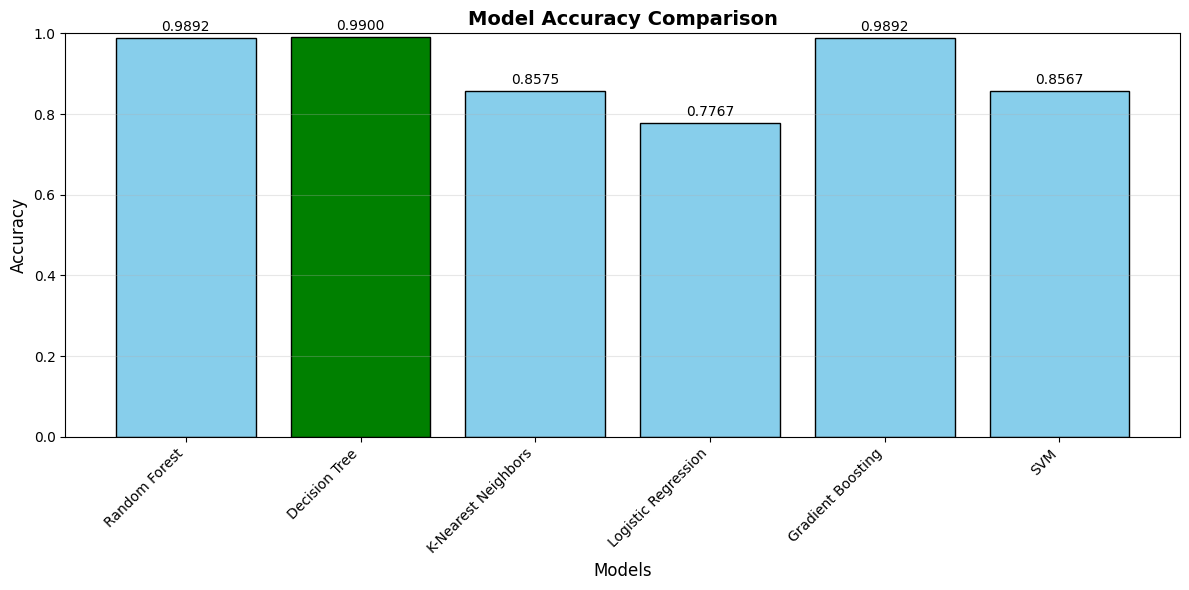

In [17]:
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())

# Find the max accuracy and its index
max_accuracy = max(accuracies)
colors = ['green' if acc == max_accuracy else 'skyblue' for acc in accuracies]

plt.bar(model_names, accuracies, color=colors, edgecolor='black')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)

# Add accuracy values on top of bars
for i, (name, acc) in enumerate(zip(model_names, accuracies)):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
import joblib

# Get the best model name
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_")}.pkl')

# Save the label encoders
joblib.dump(le, 'label_encoder_filiere.pkl')
joblib.dump(le_target, 'label_encoder_recommendation.pkl')

print(f"Best Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")
print(f"Model saved as: best_model_{best_model_name.replace(' ', '_')}.pkl")
print("Label encoders saved as: label_encoder_filiere.pkl and label_encoder_recommendation.pkl")

Best Model: Decision Tree with accuracy: 0.9900
Model saved as: best_model_Decision_Tree.pkl
Label encoders saved as: label_encoder_filiere.pkl and label_encoder_recommendation.pkl


In [19]:
# Example predictions with the best model
print(f"Using {best_model_name} for recommendations\n")
print("="*70)

# Create example students with different profiles
examples = pd.DataFrame({
    'Moyenne_Generale': [18.5, 12.0, 15.5, 10.5, 16.0],
    'Note_Maths': [19.0, 11.5, 16.0, 9.0, 17.5],
    'Note_Physique': [18.0, 12.0, 15.5, 10.0, 16.5],
    'Note_Francais': [17.5, 13.0, 14.0, 11.5, 15.0],
    'Filiere_Bac_Encoded': [3, 0, 2, 4, 1]  # SM-B, Eco-Gestion, SM-A, SVT, PC
})

# Make predictions
predictions = best_model.predict(examples)

# Decode the predictions and filiere
filiere_names = le.inverse_transform(examples['Filiere_Bac_Encoded'])
recommendation_names = le_target.inverse_transform(predictions)

# Display results
for i in range(len(examples)):
    print(f"\nStudent {i+1}:")
    print(f"  Filière Bac: {filiere_names[i]}")
    print(f"  Moyenne Générale: {examples['Moyenne_Generale'].iloc[i]}")
    print(f"  Note Maths: {examples['Note_Maths'].iloc[i]}")
    print(f"  Note Physique: {examples['Note_Physique'].iloc[i]}")
    print(f"  Note Français: {examples['Note_Francais'].iloc[i]}")
    print(f"  → Recommendation: {recommendation_names[i]}")
    print("-"*70)

Using Decision Tree for recommendations


Student 1:
  Filière Bac: SM-B
  Moyenne Générale: 18.5
  Note Maths: 19.0
  Note Physique: 18.0
  Note Français: 17.5
  → Recommendation: Medecine / Pharmacie
----------------------------------------------------------------------

Student 2:
  Filière Bac: Eco-Gestion
  Moyenne Générale: 12.0
  Note Maths: 11.5
  Note Physique: 12.0
  Note Français: 13.0
  → Recommendation: FST
----------------------------------------------------------------------

Student 3:
  Filière Bac: SM-A
  Moyenne Générale: 15.5
  Note Maths: 16.0
  Note Physique: 15.5
  Note Français: 14.0
  → Recommendation: CPGE (Prépas)
----------------------------------------------------------------------

Student 4:
  Filière Bac: SVT
  Moyenne Générale: 10.5
  Note Maths: 9.0
  Note Physique: 10.0
  Note Français: 11.5
  → Recommendation: Faculté (Licence Fondamentale)
----------------------------------------------------------------------

Student 5:
  Filière Bac: PC
  Moyenne 